In [1]:
#installing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/shreyasingh/Downloads/Random Forest/glass.csv')

## 1. Exploratory Data Analysis (EDA):

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isna().sum()


RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df['Type'].unique()


array([1., 2., 3., 5., 6., 7.])

In [11]:
df['Type'] = df['Type'].astype('category')

In [12]:
y = df['Type'].cat.codes


In [13]:
input_array = np.array([1, 2, 3, 5, 6, 7])  

# Create the output array of indices  
output_array = np.arange(len(input_array))  

print(output_array)  

[0 1 2 3 4 5]


## 2. Data Visualization:

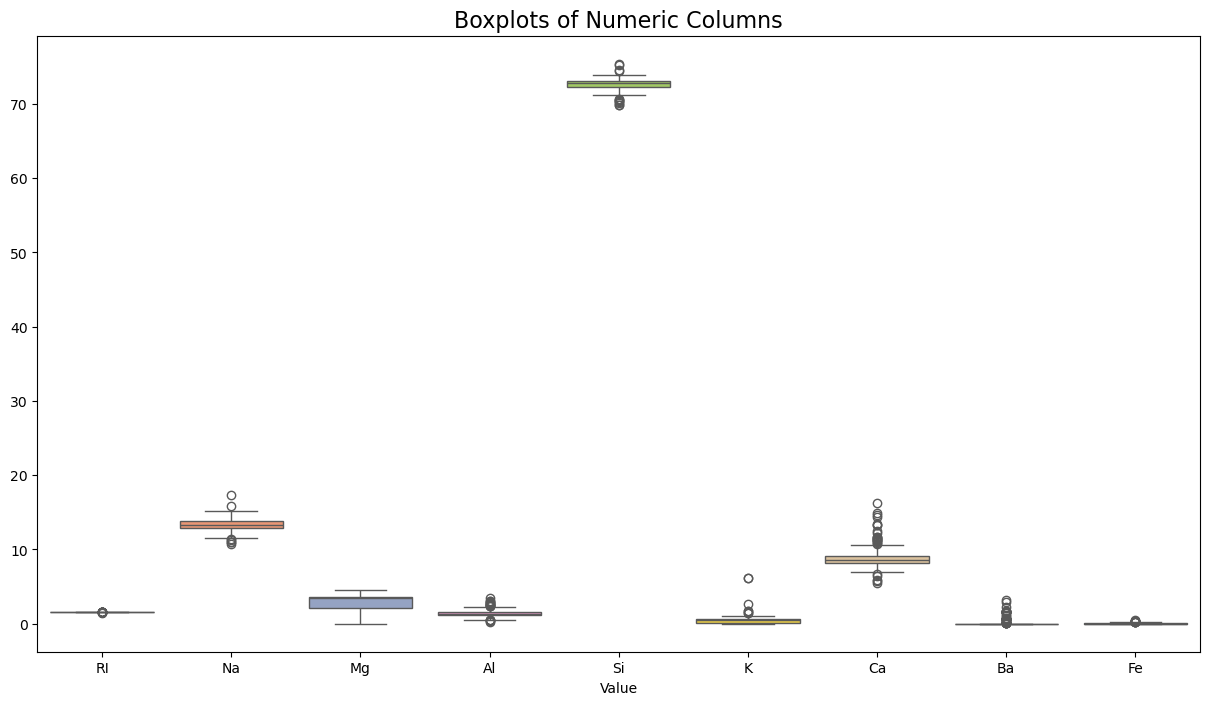

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='v', palette='Set2')   
plt.title('Boxplots of Numeric Columns', fontsize=16)
plt.xlabel('Value')
plt.show()

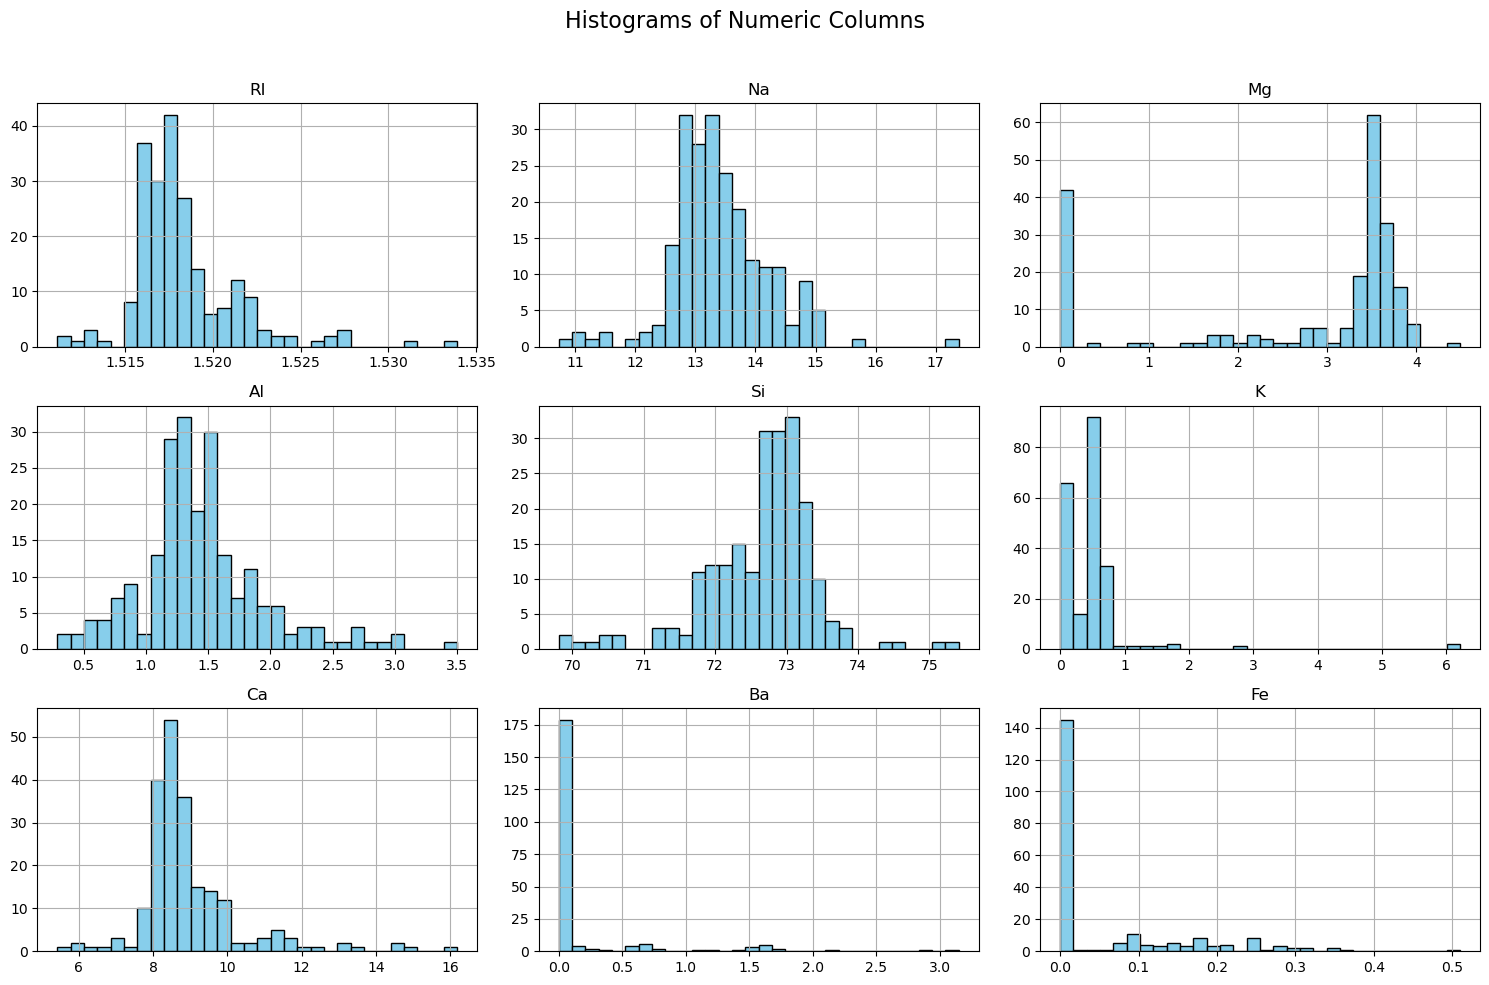

In [16]:
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [17]:
corr = df.corr()


In [18]:
corr.style.background_gradient(cmap = 'coolwarm')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<Axes: xlabel='Type', ylabel='count'>

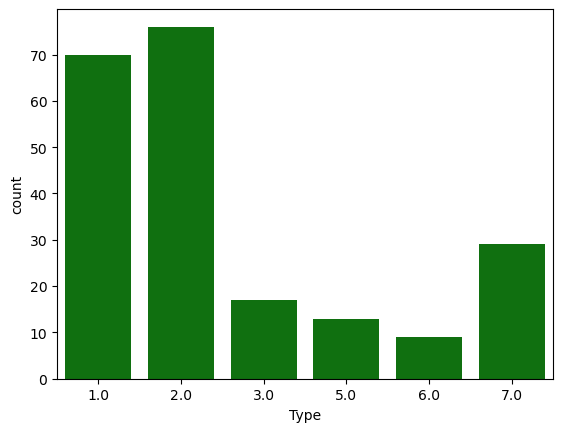

In [19]:
 
sns.countplot(x = df['Type'], color = 'green')


In [20]:
# Handling Missing Values

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [21]:
# Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [22]:
# Feature Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

## 4. Model Implementation

In [25]:
X = df.drop('Type', axis = 1)
y = df['Type']

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
#Evaluating regressor
Xtest

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
197,-0.361554,1.586056,-1.865511,1.797009,0.814078,-0.763919,-0.004904,0.977618,-0.586451
37,-0.130512,-0.819757,0.552779,-0.190536,0.399964,0.219689,-0.195068,-0.352877,-0.586451
89,-0.648705,-1.052973,0.552779,0.853427,0.749372,0.204320,-0.617656,-0.352877,0.339372
176,0.225952,0.726837,-0.204674,0.231064,-0.363559,-0.763919,0.431770,-0.352877,-0.586451
170,1.757426,0.039462,-1.865511,0.271217,-0.557675,-0.272115,2.312284,-0.352877,-0.586451
75,-0.813735,-0.476069,0.622270,0.130683,0.607021,0.296533,-0.702173,-0.352877,-0.586451
96,0.014714,-0.476069,0.650066,-0.772747,-0.402382,0.219689,0.121872,-0.352877,0.956588
137,-0.414363,-0.635638,0.650066,0.251140,0.399964,0.173582,-0.596526,-0.352877,-0.586451
5,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
83,-0.800532,-0.390147,0.580575,0.210988,0.283494,0.281164,-0.638785,-0.352877,0.339372


In [28]:
len(Xtrain)

171

In [29]:
def model_evaluation(classifier):
    cm = confusion_matrix(ytest, classifier.predict(Xtest))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

# K Nearest Neighbors Classifier


In [31]:
knn = KNeighborsClassifier()


# Cross-Validation for KNN

In [33]:
param_dist1 = {'n_neighbors' : [i for i in range(2, 25)],
             'weights' : ['uniform','distance'],
             'metric' : ['minkowski', 'manhattan']}

In [34]:
rcv1 = RandomizedSearchCV(knn, param_distributions = param_dist1, n_iter = 10, cv = 5)
rcv1.fit(X, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'manhattan'],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19, 20, 21,
                                                        22, 23, 24],
                                        'weights': ['uniform', 'distance']})

In [35]:
rcv1.best_score_


0.6777408637873755

In [36]:
rcv1.best_params_


{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}

In [37]:
knn_final = KNeighborsClassifier(n_neighbors = 7,
                                weights = 'uniform', metric = 'manhattan').fit(Xtrain, ytrain)

In [38]:
knn_final.score(Xtrain, ytrain), knn_final.score(Xtest, ytest)


(0.7309941520467836, 0.6046511627906976)

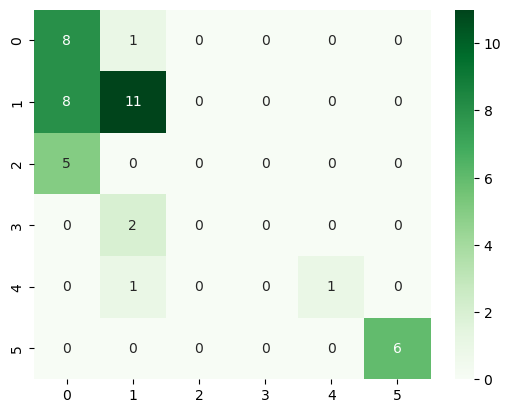

In [39]:
model_evaluation(knn_final)


# Decision Trees


In [41]:
dt = DecisionTreeClassifier()


# Cross Validation for Decision Trees 

In [43]:
param_dist3 = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}

In [44]:
rcv3 = RandomizedSearchCV(dt, param_distributions = param_dist3, n_iter = 10, cv = 5)
rcv3.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

In [45]:
rcv3.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       min_samples_split=12)

In [46]:
rcv3.best_params_


{'min_samples_split': 12,
 'max_leaf_nodes': 10,
 'max_depth': 6,
 'criterion': 'entropy'}

In [47]:
rcv3.best_score_


0.626467331118494

In [48]:
dt_final = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 10,
                                 max_depth = 6, min_samples_split = 2)
dt_final.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [49]:
dt_final.score(Xtrain, ytrain), dt_final.score(Xtest, ytest)


(0.8304093567251462, 0.6046511627906976)

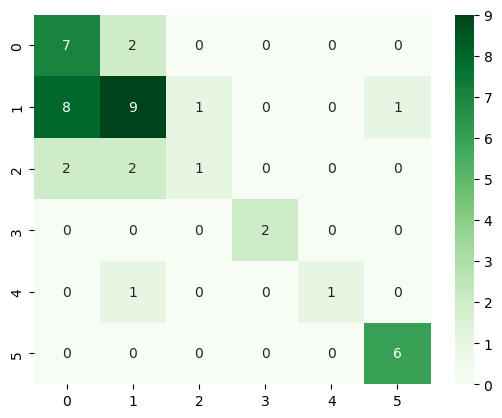

In [50]:
model_evaluation(dt_final)


# random Forest Classifier


In [52]:
rf = RandomForestClassifier()


In [53]:
param_dist4 = {'n_estimators' : [100, 120, 150, 200], 'criterion': ['gini', 'entropy']}


In [54]:
rcv4 = RandomizedSearchCV(rf, param_distributions = param_dist4, n_iter = 6, cv = 8)
rcv4.fit(X, y)

RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=6,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 120, 150, 200]})

In [55]:
rcv4.best_params_


{'n_estimators': 100, 'criterion': 'gini'}

In [56]:
rcv4.best_score_


0.7521367521367521

In [57]:
rf_final = RandomForestClassifier(50, max_depth = 5, random_state = 20)
rf_final.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=20)

In [58]:
rf_final.score(Xtrain, ytrain), rf_final.score(Xtest, ytest)


(0.9181286549707602, 0.627906976744186)

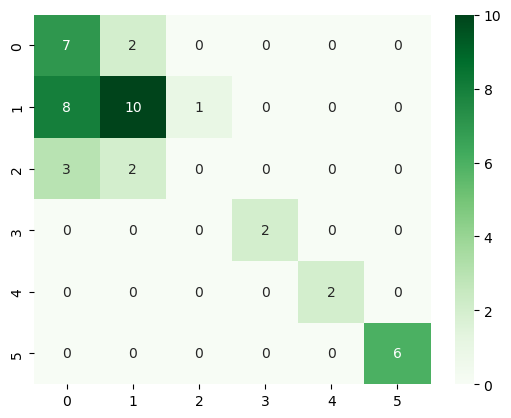

In [59]:
model_evaluation(rf_final)


# XG Boost


# Model building for XG Boost


In [ ]:
model = XGBClassifier()
model.fit(Xtrain, ytrain)

In [ ]:
model.score(Xtrain, ytrain), model.score(Xtest, ytest)


In [ ]:
model_evaluation(model)


# Bagging Classifier for Decision Trees


In [ ]:
bc = BaggingClassifier(DecisionTreeClassifier())
bc.fit(Xtrain, ytrain)

In [ ]:
bc.score(Xtrain, ytrain), bc.score(Xtest, ytest)


In [ ]:
model_evaluation(bc)


# AdaBoost Classifier

In [ ]:
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(),n_estimators = 100, learning_rate = 1, random_state = 52)
adb.fit(X_train, y_train)

In [ ]:
adb.score(X_train, y_train), adb.score(X_test, y_test)


In [ ]:
model_evaluation(adb)


# Gradient Boosting Classifier


In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.2)
gbc.fit(Xtrain, ytrain)

In [ ]:
gbc.score(Xtrain, ytrain), gbc.score(Xtest, ytest)

In [ ]:
model_evaluation(gbc)
